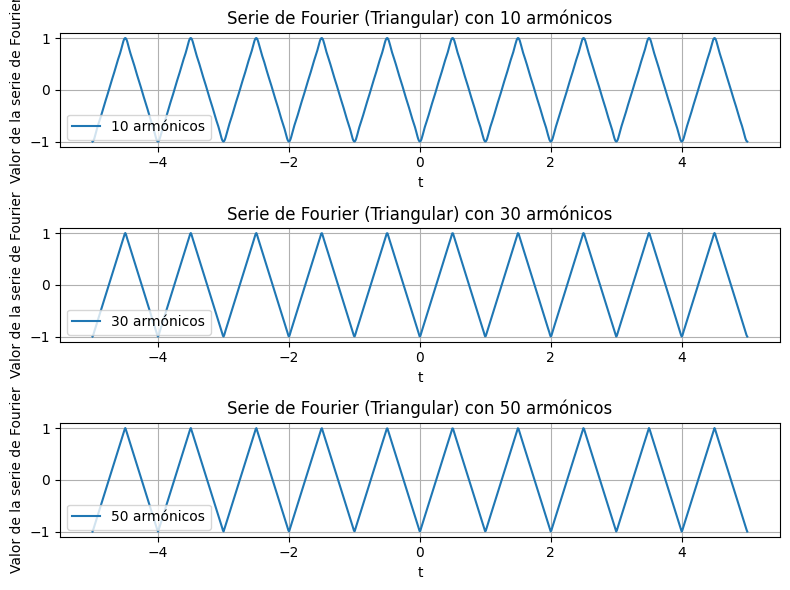

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from punto9 import calcular_an_triangular

# Generar valores de t en el rango deseado
t = np.linspace(-5, 5, num=1000)  # 1000 puntos equiespaciados entre -5 y 5

# Cantidades de armónicos para graficar
amount_of_sums = [10, 30, 50]

# Crear subplots para cada cantidad de armónicos
fig, axes = plt.subplots(len(amount_of_sums), 1, figsize=(8, 6))

# Iterar sobre cada cantidad de armónicos y graficar la serie de Fourier correspondiente para el triángulo
for idx, n in enumerate(amount_of_sums):
    resultados = []  # Lista para almacenar los resultados de la serie de Fourier para esta cantidad de armónicos
    
    # Calcular la serie de Fourier para cada valor de t
    for i in t:
        resultado = calcular_an_triangular(i, n)
        resultados.append(resultado)
    
    # Normalizar los resultados para que la amplitud máxima sea 1
    max_abs = np.max(np.abs(resultados))
    resultados /= max_abs
    
    # Graficar la señal calculada para esta cantidad de armónicos en un subplot
    ax = axes[idx] if len(amount_of_sums) > 1 else axes  # Obtener el subplot correspondiente
    
    ax.plot(t, resultados, label=f'{n} armónicos')  # Graficar
    
    ax.set_xlabel('t')
    ax.set_ylabel('Valor de la serie de Fourier')
    ax.set_title(f'Serie de Fourier (Triangular) con {n} armónicos')
    ax.legend()
    ax.grid(True)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [7]:
# Calcular el error cuadrático medio (MSE)
def calcular_mse(funcion_original, aproximacion_funcion, t_eval):
    N = len(t_eval)
    mse = np.mean((funcion_original(t_eval) - aproximacion_funcion)**2)
    return mse

# Definir la función original (triángulo)
def original_triangular(t):
    t = t % 4  # Para un triángulo con período 4
    return 1 - np.abs(t - 2)

# Generar puntos de evaluación en zonas sin discontinuidades
t_eval = np.linspace(-5, 5, num=1000)

# Calcular las aproximaciones con diferentes cantidades de armónicos
aprox_10 = np.array([calcular_an_triangular(t, 10) for t in t_eval])
aprox_30 = np.array([calcular_an_triangular(t, 30) for t in t_eval])
aprox_50 = np.array([calcular_an_triangular(t, 50) for t in t_eval])

# Calcular el MSE para cada aproximación
mse_10 = calcular_mse(original_triangular, aprox_10, t_eval)
mse_30 = calcular_mse(original_triangular, aprox_30, t_eval)
mse_50 = calcular_mse(original_triangular, aprox_50, t_eval)

# Reportar los resultados
print("Error Cuadrático Medio (MSE) con 10 armónicos:", mse_10)
print("Error Cuadrático Medio (MSE) con 30 armónicos:", mse_30)
print("Error Cuadrático Medio (MSE) con 50 armónicos:", mse_50)

Error Cuadrático Medio (MSE) con 10 armónicos: 0.6668670596047964
Error Cuadrático Medio (MSE) con 30 armónicos: 0.666971013481726
Error Cuadrático Medio (MSE) con 50 armónicos: 0.6669832797585873


In [91]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, cos

# Definir la función original (triángulo)
def original_triangular(t):
    t = t % 4  # Utilizar t módulo 4 para un triángulo con período 4
    return 1 - np.abs(t - 2)

# Función para calcular an del triángulo con frecuencia ajustada por armónico
def an_triangular(t, n, frecuencia):
    return 4 * ((((-1)**n)-1)/((pi**2)*(n**2))) * (cos(2*pi*frecuencia*t))

# Función para calcular la serie de Fourier (sumatoria de an) para el triángulo con frecuencia ajustada
def calcular_serie_fourier(t, armonicos):
    val_actual_serie_an = 0
    for i in range(1, armonicos + 1):
        frecuencia = 999/4144 * i  # Frecuencia proporcional al armónico i
        val_actual_serie_an += an_triangular(t, i, frecuencia)
    return val_actual_serie_an

# Función para calcular el error cuadrático medio (MSE)
def calcular_mse(funcion_original, aproximacion_funcion, t_eval):
    mse = np.mean((funcion_original(t_eval) - aproximacion_funcion)**2)
    return mse

# Función para aproximación con MSE objetivo y límite de armónicos
def aproximar_con_mse(funcion_original, t_eval, mse_objetivo=0.01, max_armonicos=1000):
    armonicos = 1
    while True:
        aproximacion = np.array([calcular_serie_fourier(t, armonicos) for t in t_eval])
        mse_actual = calcular_mse(funcion_original, aproximacion, t_eval)
        if mse_actual <= mse_objetivo or armonicos >= max_armonicos:
            return aproximacion, armonicos
        armonicos += 1

# Generar puntos de evaluación en zonas sin discontinuidades
t_eval = np.linspace(-5, 5, num=100)

# Aproximar con MSE objetivo y límite de armónicos
aproximacion_final, num_armonicos = aproximar_con_mse(original_triangular, t_eval, mse_objetivo=0.01, max_armonicos=100)

# Graficar la señal original y la aproximación final
plt.figure(figsize=(8, 6))
plt.plot(t_eval, original_triangular(t_eval), label='Señal Original (Triángulo)')
plt.plot(t_eval, aproximacion_final, label=f'Aproximación con {num_armonicos} armónicos')
plt.xlabel('t')
plt.ylabel('Valor')
plt.title('Aproximación de Serie de Fourier vs. Señal Original')
plt.legend()
plt.grid(True)
plt.show()

# Informar la cantidad de armónicos necesarios
print(f"Cantidad de armónicos utilizados: {num_armonicos}")




KeyboardInterrupt: 